In [18]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


In [49]:
# !pip list

In [2]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from IPython.display import display

In [3]:
import time

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Lasso
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [4]:
%reload_ext autoreload
%autoreload 2

## Data Import 

In [290]:
df = pd.read_csv('data.csv',index_col=0)

In [291]:
df.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [292]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [293]:
df.describe()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [294]:
df.shape

(18207, 88)

In [295]:
df_small= df[['Value', 'Age', 'Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',]]

In [296]:
df_small.shape

(18207, 32)

In [297]:
# Remove rows with NaN specs
df_small2 = df_small.loc[(-pd.isnull(df_small['Skill Moves']))]
df_small2.shape

(18159, 32)

In [298]:
# Remove rows with zero euro value
df_small2 = df_small2.loc[(df_small['Value']!='€0')]
df_small2.shape

(17907, 32)

In [299]:
def valueconv(value:str):
  value_num = float(value[1:-1])
  if value[-1]=='K':
    return 1000 * value_num
  if value[-1]=='M':
    return 1000000 * value_num
  else:
    raise ValueError

df_small2['Value'] = df_small2['Value'].apply(valueconv)
df_small2.shape

(17907, 32)

In [21]:
pd.options.display.max_columns = None
display(df_small2.describe())

,Value,Age,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,1.790700e+04,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000,17907.000000
mean,2.450133e+06,25.095605,2.363042,49.751885,45.586698,52.298878,58.717261,42.935500,55.420283,47.218630,42.882281,52.726867,58.415871,64.622494,64.741107,63.535321,61.822695,63.969956,55.493829,65.124365,63.223041,65.325180,47.134417,55.879209,46.690847,50.004077,53.452784,48.546043,58.651868,47.262467,47.684202,45.644441
std,5.633207e+06,4.660388,0.756256,18.351445,19.511503,17.361599,14.673721,17.685432,18.899100,18.384605,17.477595,15.305152,16.661648,14.926418,14.645652,14.759304,9.022621,14.145871,17.212851,11.828374,15.880736,12.551374,19.247658,17.351038,20.691339,19.517254,14.108852,15.685745,11.421007,19.872750,21.647299,21.271215
min,1.000000e+04,16.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000
25%,3.250000e+05,21.000000,2.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,39.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000
50%,7.000000e+05,25.000000,2.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000
75%,2.100000e+06,28.000000,3.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,1.185000e+08,45.000000,5.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000


In [301]:
df_small2.head(5)

,Value,Age,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,110500000.0,31,4.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,77000000.0,33,5.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,...,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0
2,118500000.0,26,5.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,...,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0
3,72000000.0,27,1.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,...,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0
4,102000000.0,27,4.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,...,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0


In [302]:
df_small2.shape

(17907, 32)

In [303]:
pd.DataFrame.to_pickle(df_small2,"./input/df_small2.pkl")

In [304]:
df_small2['Value'].value_counts()

1100000.0      431
375000.0       366
425000.0       349
325000.0       344
450000.0       340
              ... 
93000000.0       1
72000000.0       1
102000000.0      1
58000000.0       1
43000000.0       1
Name: Value, Length: 216, dtype: int64

In [305]:
df_small2.dtypes

Value              float64
Age                  int64
Skill Moves        float64
Crossing           float64
Finishing          float64
HeadingAccuracy    float64
ShortPassing       float64
Volleys            float64
Dribbling          float64
Curve              float64
FKAccuracy         float64
LongPassing        float64
BallControl        float64
Acceleration       float64
SprintSpeed        float64
Agility            float64
Reactions          float64
Balance            float64
ShotPower          float64
Jumping            float64
Stamina            float64
Strength           float64
LongShots          float64
Aggression         float64
Interceptions      float64
Positioning        float64
Vision             float64
Penalties          float64
Composure          float64
Marking            float64
StandingTackle     float64
SlidingTackle      float64
dtype: object

## EDA

In [21]:
df_small2 = pd.read_pickle('./input/df_small2.pkl')
df_small2['Value'] = np.log10(df_small2['Value'])

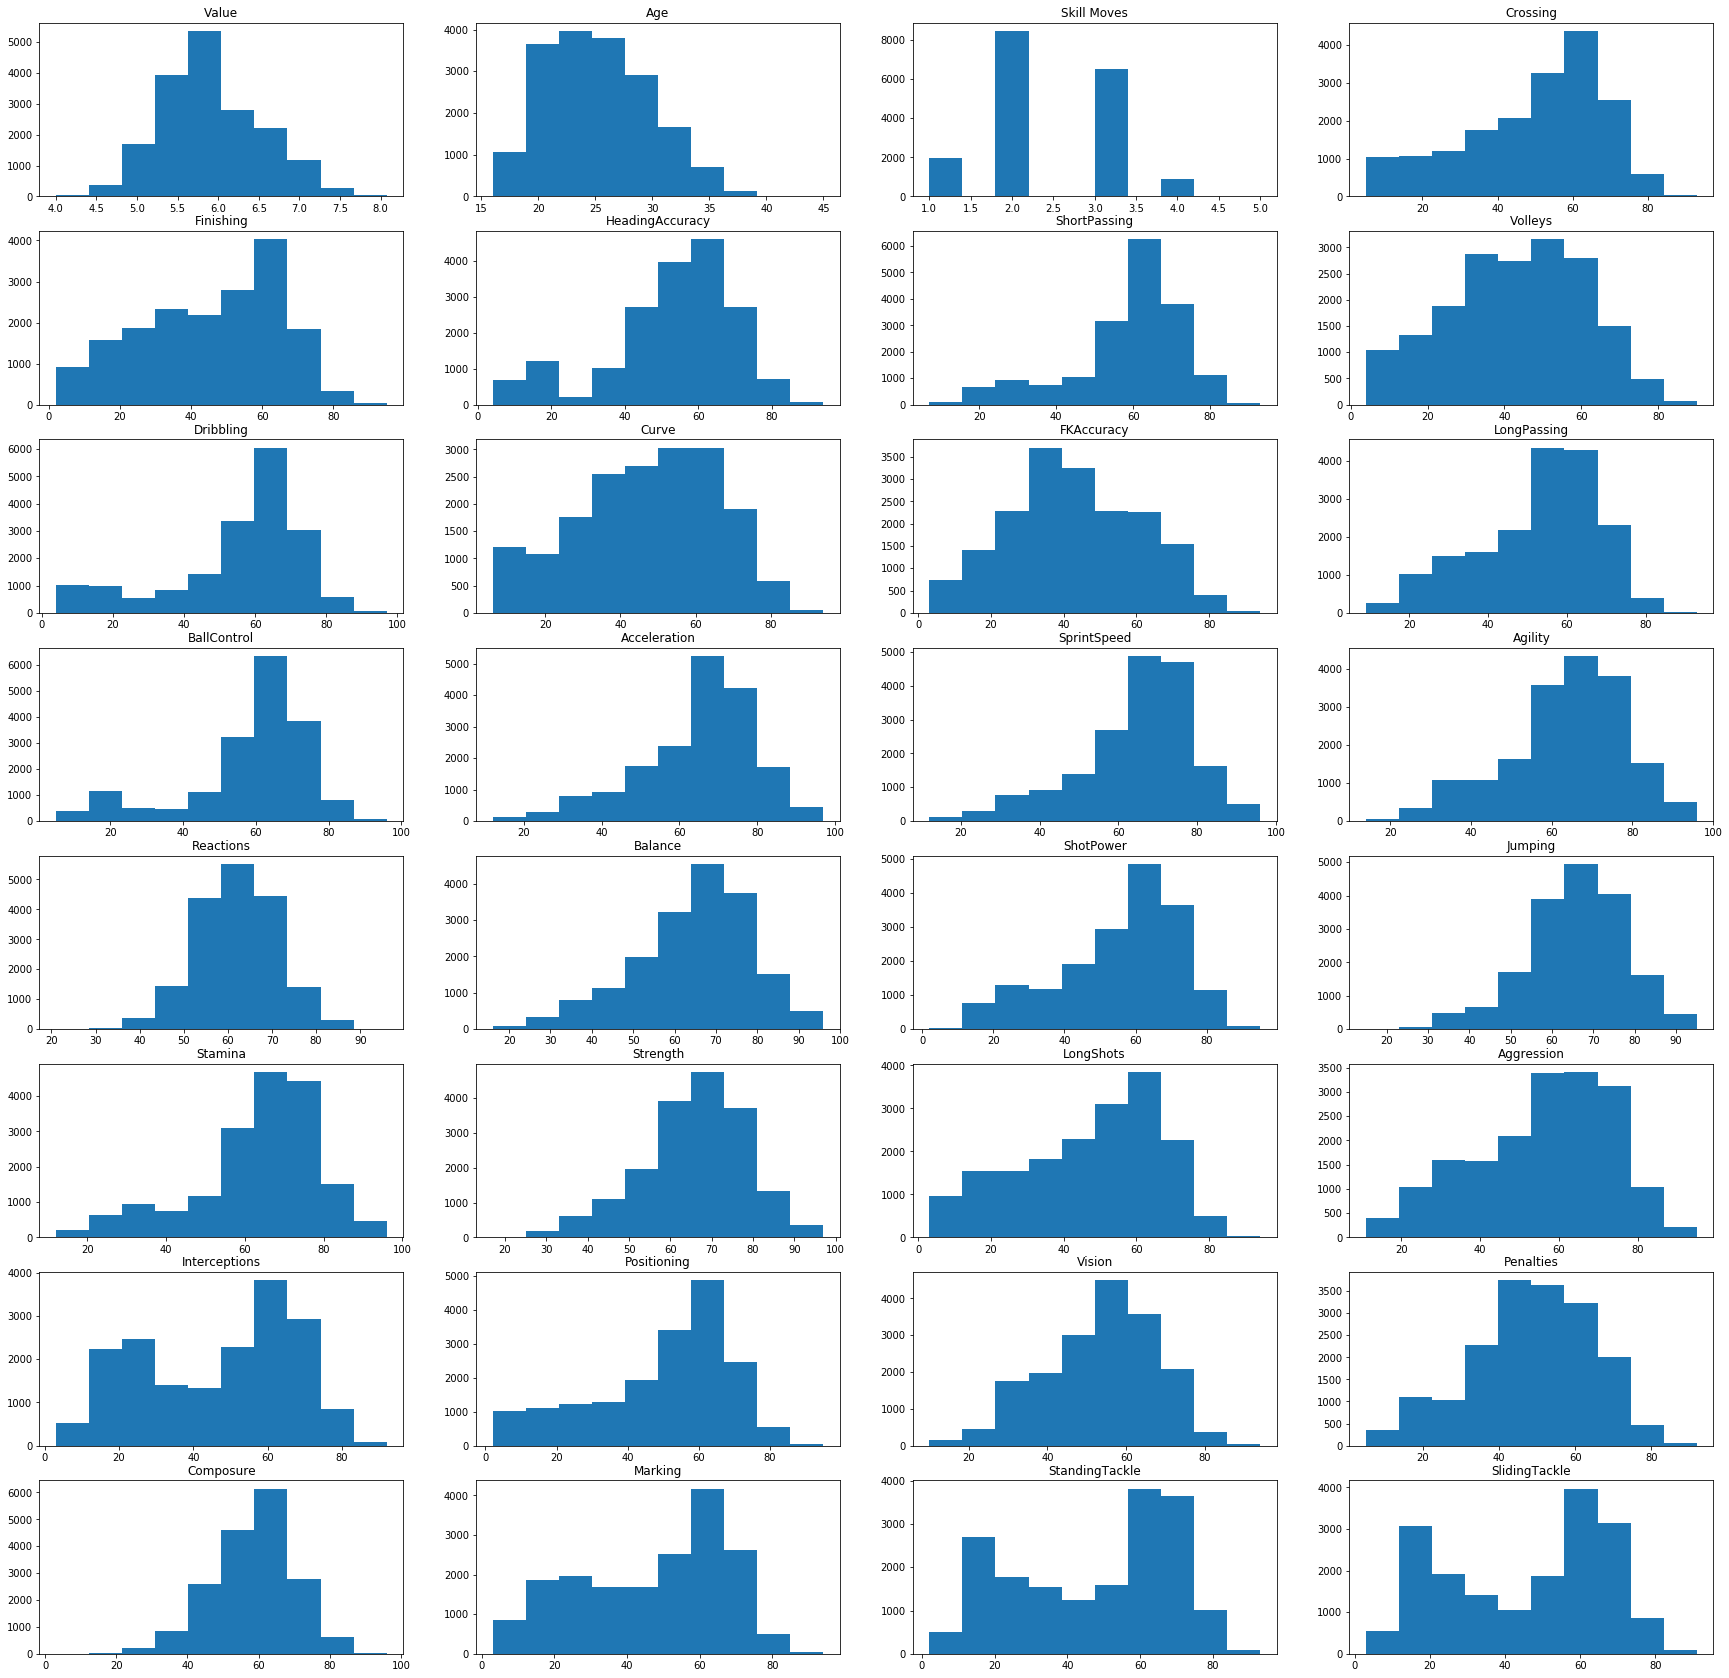

In [54]:
fig, axs = plt.subplots(8, 4,figsize=(30,30))
def hist_graph (i, title):
    axs[i // 4][i % 4].set_title(title)
    axs[i // 4][i % 4].hist(df_small2[title])

for i in range(32): hist_graph(i,df_small2.columns[i])
# plt.show()
plt.savefig('./output/histograms.png')

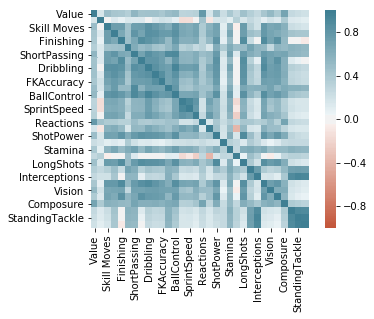

In [23]:
corr = df_small2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [ ]:
pairplot = sns.pairplot(df_small2)
pairplot.savefig("./output/pairplot.png")

## Data Analysis

In [40]:
df_small2 = pd.read_pickle('./input/df_small2.pkl')
df_small2['Value'] = np.log10(df_small2['Value'])

### Train/Validation Split

In [41]:
y = df_small2['Value']
X = df_small2.drop(['Value'],axis=1)

In [42]:
y.shape,X.shape

((17907,), (17907, 31))

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1111)

In [37]:
display(X_train.describe())
display(X_test.describe())
display(y_train.describe())
display(y_test.describe())

,Age,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,...,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000,14325.000000
mean,25.077068,2.363630,49.731239,45.572565,52.243700,58.706387,42.899825,55.416824,47.203281,42.887539,...,47.109389,55.818429,46.593019,49.984782,53.452496,48.516161,58.648237,47.187435,47.604677,45.547435
std,4.643496,0.758589,18.386992,19.529476,17.376328,14.707497,17.694720,18.937249,18.430610,17.501522,...,19.278326,17.400787,20.738521,19.549332,14.099491,15.689455,11.426722,19.894187,21.684288,21.310446
min,16.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,...,4.000000,11.000000,3.000000,2.000000,10.000000,7.000000,3.000000,3.000000,2.000000,3.000000
25%,21.000000,2.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,...,33.000000,44.000000,26.000000,39.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000
50%,25.000000,2.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,...,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,59.000000,52.000000,55.000000,52.000000
75%,28.000000,3.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,56.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,45.000000,5.000000,92.000000,95.000000,93.000000,93.000000,90.000000,97.000000,94.000000,94.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,91.000000,96.000000,94.000000,92.000000,91.000000


,Age,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
count,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,...,3582.000000,3582.000000,3582.000000,3582.00000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000,3582.000000
mean,25.169738,2.360692,49.834450,45.643216,52.519542,58.760748,43.078169,55.434115,47.280011,42.861251,...,47.234506,56.122278,47.082077,50.08124,53.453936,48.665550,58.666387,47.562535,48.002233,46.032384
std,4.727267,0.746954,18.210909,19.442079,17.303233,14.539818,17.649984,18.748381,18.201885,17.383996,...,19.126871,17.150894,20.499773,19.39096,14.148195,15.672519,11.399701,19.786712,21.498810,21.112101
min,16.000000,1.000000,7.000000,4.000000,6.000000,8.000000,4.000000,5.000000,6.000000,6.000000,...,3.000000,12.000000,5.000000,2.00000,10.000000,5.000000,12.000000,5.000000,6.000000,4.000000
25%,21.000000,2.000000,38.000000,30.000000,45.000000,54.000000,31.000000,49.000000,35.000000,31.000000,...,33.000000,45.000000,26.000000,39.00000,44.000000,39.000000,51.000000,30.000000,27.000000,25.000000
50%,25.000000,2.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,42.000000,...,51.000000,59.000000,52.000000,55.00000,55.000000,49.000000,60.000000,53.000000,55.000000,53.000000
75%,29.000000,3.000000,64.000000,61.000000,65.000000,68.000000,57.000000,68.000000,62.000000,57.000000,...,62.000000,69.000000,64.000000,64.00000,64.000000,60.000000,66.000000,64.000000,66.000000,64.000000
max,40.000000,5.000000,93.000000,94.000000,94.000000,93.000000,87.000000,90.000000,88.000000,87.000000,...,92.000000,94.000000,89.000000,93.00000,94.000000,92.000000,90.000000,93.000000,93.000000,90.000000


count    14325.000000
mean         5.916976
std          0.612130
min          4.000000
25%          5.511883
50%          5.845098
75%          6.322219
max          8.073718
Name: Value, dtype: float64

count    3582.000000
mean        5.913688
std         0.607074
min         4.000000
25%         5.511883
50%         5.845098
75%         6.301030
max         8.008600
Name: Value, dtype: float64

### Option 1: One-layered CV for model & hyperparameter combinations

In [230]:
preprocessor = Pipeline(steps=[
                               ('scaler',MinMaxScaler()),
                               ('polynom',PolynomialFeatures(2,include_bias=False))
])

In [30]:
regs = [
        Lasso(alpha=0.0001),
        Lasso(alpha=0.01),
        LGBMRegressor(random_state=1000,min_data_in_leaf=100,num_leaves=40),
        LGBMRegressor(random_state=1000,min_data_in_leaf=100,num_leaves=80),
        LGBMRegressor(random_state=1000,min_data_in_leaf=200,num_leaves=40),
        LGBMRegressor(random_state=1000,min_data_in_leaf=200,num_leaves=80),
        MLPRegressor(random_state=2000,early_stopping=True,hidden_layer_sizes=(100,)),
        MLPRegressor(random_state=2000,early_stopping=True,hidden_layer_sizes=(50,50,)),
        MLPRegressor(random_state=2000,early_stopping=False,hidden_layer_sizes=(100,)),
        MLPRegressor(random_state=2000,early_stopping=False,hidden_layer_sizes=(50,50,)),
        SVR(C=1.0,epsilon=0.1),
        SVR(C=1.0,epsilon=0.2),
        SVR(C=2.0,epsilon=0.1),
        SVR(C=2.0,epsilon=0.2),
]

In [232]:
pipe_ls = [ Pipeline(steps=[
                       ('preprocess',preprocessor),
                       ('reg',regs[i])
                       ])
        for i in range(len(regs))
]

In [233]:
cv = KFold(n_splits=5, shuffle=True, random_state=3333)

In [234]:
cv_val_list = []
cv_score_list = []
time_list = []
for i in range(len(regs)):
    print('----------------- Model #'+str(i)+" -----------------")
    print('Model specs:')
    print(pipe_ls[i].get_params()['steps'][-1])
    print()
    print('Run CV:')
    time0 = time.time()
    cv_val = cross_validate(pipe_ls[i],X_train,y_train,scoring='r2',cv=cv,n_jobs=-1,verbose=10, return_estimator=True)
    cv_val_list += [cv_val]
    cv_score_list += [cv_val['test_score']]
    print('\nScores are:')
    print(cv_val['test_score'])
    print('\nRuntime is:')
    print(time.time()-time0,'sec')
    time_list += [time.time()-time0]
    print()

----------------- Model #0 -----------------
Model specs:
('reg', Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))

Run CV:


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   13.9s remaining:   21.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   14.1s remaining:    9.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



Scores are:
[0.90863199 0.91008691 0.90770844 0.90216655 0.90631019]

Runtime is:
14.403000116348267 sec

----------------- Model #1 -----------------
Model specs:
('reg', Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))

Run CV:


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    3.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.3s finished



Scores are:
[0.71432316 0.70336623 0.7155556  0.69921581 0.69792667]

Runtime is:
3.4069976806640625 sec

----------------- Model #2 -----------------
Model specs:
('reg', LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=100,
       min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=40,
       objective=None, random_state=1000, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=0))

Run CV:


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   24.8s remaining:   37.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   24.9s remaining:   16.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



Scores are:
[0.93566041 0.93617837 0.93485224 0.92893151 0.93638121]

Runtime is:
25.36999797821045 sec

----------------- Model #3 -----------------
Model specs:
('reg', LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=100,
       min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=80,
       objective=None, random_state=1000, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=0))

Run CV:


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   33.0s remaining:   49.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   33.1s remaining:   22.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



Scores are:
[0.93772483 0.93618514 0.93321344 0.92779234 0.93649379]

Runtime is:
33.32853817939758 sec

----------------- Model #4 -----------------
Model specs:
('reg', LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=200,
       min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=40,
       objective=None, random_state=1000, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=0))

Run CV:


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.4s remaining:   29.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   19.5s remaining:   13.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



Scores are:
[0.93483555 0.93166977 0.93161197 0.92401412 0.93320489]

Runtime is:
19.882041454315186 sec

----------------- Model #5 -----------------
Model specs:
('reg', LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=200,
       min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=80,
       objective=None, random_state=1000, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=0))

Run CV:


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   20.6s remaining:   31.0s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   20.7s remaining:   13.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



Scores are:
[0.93456691 0.93035923 0.93203597 0.92434189 0.93139205]

Runtime is:
20.895000457763672 sec

----------------- Model #6 -----------------
Model specs:
('reg', MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=2000, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))

Run CV:


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   37.6s remaining:   56.5s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   38.5s remaining:   25.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   45.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   45.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



Scores are:
[0.92636427 0.92926528 0.93036791 0.92613748 0.93669303]

Runtime is:
45.2798638343811 sec

----------------- Model #7 -----------------
Model specs:
('reg', MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=2000, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))

Run CV:


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   20.8s remaining:   31.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   22.0s remaining:   14.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



Scores are:
[0.93852989 0.93590311 0.93379429 0.93491726 0.9318254 ]

Runtime is:
27.04522156715393 sec

----------------- Model #8 -----------------
Model specs:
('reg', MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=2000, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))

Run CV:


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   35.6s remaining:   53.5s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   35.7s remaining:   23.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   47.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   47.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



Scores are:
[0.92519206 0.93273321 0.92862672 0.92426327 0.9375377 ]

Runtime is:
47.41220140457153 sec

----------------- Model #9 -----------------
Model specs:
('reg', MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=2000, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))

Run CV:


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   20.7s remaining:   31.2s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   21.6s remaining:   14.3s



Scores are:
[0.93416911 0.93501288 0.88817386 0.90388875 0.92461697]

Runtime is:
22.931959867477417 sec

----------------- Model #10 -----------------
Model specs:
('reg', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))

Run CV:


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.5min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.5min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.5min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



Scores are:
[0.8327634  0.85403137 0.85745521 0.8443681  0.84629173]

Runtime is:
148.07799243927002 sec

----------------- Model #11 -----------------
Model specs:
('reg', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))

Run CV:


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.3min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.3min remaining:   53.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



Scores are:
[0.82642255 0.84726895 0.84935594 0.83658771 0.8381668 ]

Runtime is:
81.32103824615479 sec

----------------- Model #12 -----------------
Model specs:
('reg', SVR(C=2.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))

Run CV:


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  2.3min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.3min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



Scores are:
[0.85692424 0.87704157 0.87938274 0.86701694 0.86864061]

Runtime is:
139.17402172088623 sec

----------------- Model #13 -----------------
Model specs:
('reg', SVR(C=2.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))

Run CV:


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  1.2min remaining:   48.0s



Scores are:
[0.85026475 0.87061986 0.87063437 0.85973745 0.86039224]

Runtime is:
73.29497265815735 sec



[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


In [235]:
with open('./output/opt1_val.pkl', 'wb') as f:
    pickle.dump(cv_val_list, f)
with open('./output/opt1_scores.pkl', 'wb') as f:
    pickle.dump(cv_score_list, f)
with open('./output/opt1_time.pkl', 'wb') as f:
    pickle.dump(time_list, f)

In [28]:
# with open('./output/opt1_val.pkl', 'rb') as f:
#     cv_val_list = pickle.load(f)
# with open('./output/opt1_scores.pkl', 'rb') as f:
#     cv_score_list = pickle.load(f)
# with open('./output/opt1_time.pkl', 'rb') as f:
#     time_list = pickle.load(f)

In [256]:
print('Total runtime is',sum(time_list)/60,'min.')

Total runtime is 11.6970809618632 min.


In [238]:
pd.DataFrame(
    list(zip(
        time_list,
        [np.round(sc,5) for sc in cv_score_list],
        [l.mean() for l in cv_score_list],
        [np.sqrt(l.var()) for l in cv_score_list],
        regs,
    )),
    columns=['time','scores','mean_score','sd_score','model'])

,time,scores,mean_score,sd_score,model
0,14.403000,"[0.90863, 0.91009, 0.90771, 0.90217, 0.90631]",0.906981,0.002703,"Lasso(alpha=0.0001, copy_X=True, fit_intercept..."
1,3.408007,"[0.71432, 0.70337, 0.71556, 0.69922, 0.69793]",0.706077,0.007466,"Lasso(alpha=0.01, copy_X=True, fit_intercept=T..."
2,25.369998,"[0.93566, 0.93618, 0.93485, 0.92893, 0.93638]",0.934401,0.002785,"LGBMRegressor(boosting_type='gbdt', class_weig..."
3,33.328538,"[0.93772, 0.93619, 0.93321, 0.92779, 0.93649]",0.934282,0.003567,"LGBMRegressor(boosting_type='gbdt', class_weig..."
4,19.883043,"[0.93484, 0.93167, 0.93161, 0.92401, 0.9332]",0.931067,0.003720,"LGBMRegressor(boosting_type='gbdt', class_weig..."
5,20.895000,"[0.93457, 0.93036, 0.93204, 0.92434, 0.93139]",0.930539,0.003395,"LGBMRegressor(boosting_type='gbdt', class_weig..."
6,45.279864,"[0.92636, 0.92927, 0.93037, 0.92614, 0.93669]",0.929766,0.003830,"MLPRegressor(activation='relu', alpha=0.0001, ..."
7,27.045222,"[0.93853, 0.9359, 0.93379, 0.93492, 0.93183]",0.934994,0.002228,"MLPRegressor(activation='relu', alpha=0.0001, ..."
8,47.412201,"[0.92519, 0.93273, 0.92863, 0.92426, 0.93754]",0.929671,0.004933,"MLPRegressor(activation='relu', alpha=0.0001, ..."
9,22.931960,"[0.93417, 0.93501, 0.88817, 0.90389, 0.92462]",0.917172,0.018330,"MLPRegressor(activation='relu', alpha=0.0001, ..."


#### Getting final score from test data for the best model.

In [44]:
%%time
pipe_best_opt1 = Pipeline(steps=[
                       ('preprocess',preprocessor),
                       ('reg',MLPRegressor(random_state=2000,early_stopping=True,hidden_layer_sizes=(50,50,)))
                       ])
pipe_best_opt1.fit(X_train,y_train)

C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Wall time: 14.8 s


In [45]:
pipe_best_opt1.score(X_train,y_train)

0.9368913647335271

In [46]:
pipe_best_opt1.score(X_test,y_test)

0.9318125487712493

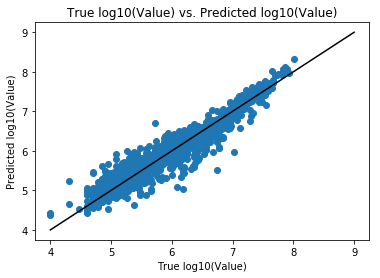

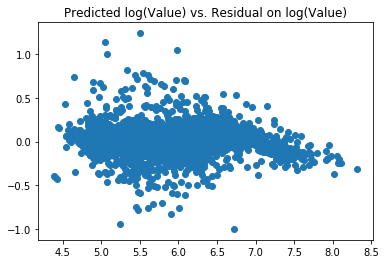

In [48]:
y_test_pred = pipe_best_opt1.predict(X_test)
plt.scatter(y_test,y_test_pred)
grid = np.linspace(4, 9, 2)
plt.plot(grid, grid, color="black")
plt.title('True log10(Value) vs. Predicted log10(Value)')
plt.xlabel('True log10(Value)'); plt.ylabel('Predicted log10(Value)')
plt.show()
plt.scatter(y_test_pred,y_test-y_test_pred)
plt.title('Predicted log(Value) vs. Residual on log(Value)')
plt.show()

### Option 2: Two-layered CV for models (outer loop) and hyperparameter (inner loop)

In [239]:
preprocessor = Pipeline(steps=[
                               ('scaler',MinMaxScaler()),
                               ('polynom',PolynomialFeatures(2,include_bias=False))
])

In [33]:
regs = [
        Lasso(),
        LGBMRegressor(random_state=1000),
        MLPRegressor(random_state=2000),
        SVR(),
]

In [241]:
pipe_ls = [ Pipeline(steps=[
                       ('preprocess',preprocessor),
                       ('reg',regs[i])
                       ])
        for i in range(len(regs))
]

In [242]:
gridParams = [
              {'reg__alpha': [0.0001, 0.01]}, #Lasso
              {'reg__min_data_in_leaf': [100,200], 'reg__num_leaves': [40,80]}, #lightGBM
              {'reg__early_stopping': [True,False], 'reg__hidden_layer_sizes': [(100,),(50,50,)]}, #MLPRegressor
              {'reg__C': [1.0,2.0], 'reg__epsilon':[0.1,0.2]} #SVR
]

In [243]:
outer_cv = KFold(n_splits=5, shuffle=True, random_state=3333) #Same conditions as Option 1
inner_cv = KFold(n_splits=5, shuffle=True, random_state=3335)

In [244]:
grid_ls = [
    GridSearchCV(pipe_ls[i], gridParams[i], cv=inner_cv, scoring='r2', n_jobs=-1, verbose=10,refit=True) 
    for i in range(len(regs))
]

In [245]:
cv_val_list = []
cv_score_list = []
time_list = []
for i in range(len(regs)):
    print('----------------- Model #'+str(i)+" -----------------")
    print('Model specs:')
    print(pipe_ls[i].get_params()['steps'][-1])
    print()
    print('Run CV:')
    time0 = time.time()
    cv_val = cross_validate(grid_ls[i],X_train,y_train,scoring='r2',cv=outer_cv,n_jobs=-1,verbose=10, return_estimator=True)
    cv_val_list += [cv_val]
    cv_score_list += [cv_val['test_score']]
    print('\nScores are:')
    print(cv_val['test_score'])
    print('\nRuntime is:')
    print(time.time()-time0,'sec')
    time_list += [time.time()-time0]
    print()

----------------- Model #0 -----------------
Model specs:
('reg', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))

Run CV:


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   56.5s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   56.7s remaining:   37.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   57.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   57.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



Scores are:
[0.90863199 0.91008691 0.90770844 0.90216655 0.90631019]

Runtime is:
57.109376430511475 sec

----------------- Model #1 -----------------
Model specs:
('reg', LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=1000, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0))

Run CV:


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.1min remaining:  7.7min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  5.1min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



Scores are:
[0.93566041 0.93617837 0.93485224 0.92893151 0.93638121]

Runtime is:
310.27563095092773 sec

----------------- Model #2 -----------------
Model specs:
('reg', MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=2000, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))

Run CV:


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  9.6min remaining: 14.4min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed: 10.0min remaining:  6.7min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.



Scores are:
[0.93416911 0.93590311 0.93379429 0.93491726 0.93669303]

Runtime is:
611.486261844635 sec

----------------- Model #3 -----------------
Model specs:
('reg', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False))

Run CV:


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed: 23.4min remaining: 35.0min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed: 23.4min remaining: 15.6min



Scores are:
[0.85692424 0.87704157 0.87938274 0.86701694 0.86864061]

Runtime is:
1403.42568898201 sec



[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 23.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 23.4min finished


In [246]:
with open('./output/opt2_val.pkl', 'wb') as f:
    pickle.dump(cv_val_list, f)
with open('./output/opt2_scores.pkl', 'wb') as f:
    pickle.dump(cv_score_list, f)
with open('./output/opt2_time.pkl', 'wb') as f:
    pickle.dump(time_list, f)

In [34]:
# with open('./output/opt2_val.pkl', 'rb') as f:
#     cv_val_list = pickle.load(f)
# with open('./output/opt2_scores.pkl', 'rb') as f:
#     cv_score_list = pickle.load(f)
# with open('./output/opt2_time.pkl', 'rb') as f:
#     time_list = pickle.load(f)

In [248]:
print('Total runtime is',sum(time_list)/60,'min.')

Total runtime is 39.704965945084886 min.


In [249]:
for i in range(len(regs)):
    print('----Model',i,'----')
    for j in range(5):
        print('Best params in inner-CV #',j,cv_val_list[i]['estimator'][j].best_params_)

----Model 0 ----
Best params in inner-CV # 0 {'reg__alpha': 0.0001}
Best params in inner-CV # 1 {'reg__alpha': 0.0001}
Best params in inner-CV # 2 {'reg__alpha': 0.0001}
Best params in inner-CV # 3 {'reg__alpha': 0.0001}
Best params in inner-CV # 4 {'reg__alpha': 0.0001}
----Model 1 ----
Best params in inner-CV # 0 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Best params in inner-CV # 1 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Best params in inner-CV # 2 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Best params in inner-CV # 3 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Best params in inner-CV # 4 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
----Model 2 ----
Best params in inner-CV # 0 {'reg__early_stopping': False, 'reg__hidden_layer_sizes': (50, 50)}
Best params in inner-CV # 1 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}
Best params in inner-CV # 2 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)

In [250]:
pd.DataFrame(
    list(zip(
        time_list,
        [np.round(sc,5) for sc in cv_score_list],
        [l.mean() for l in cv_score_list],
        [np.sqrt(l.var()) for l in cv_score_list],
        regs,
    )),
    columns=['time','scores','mean_score','sd_score','model'])

,time,scores,mean_score,sd_score,model
0,57.109376,"[0.90863, 0.91009, 0.90771, 0.90217, 0.90631]",0.906981,0.002703,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr..."
1,310.276629,"[0.93566, 0.93618, 0.93485, 0.92893, 0.93638]",0.934401,0.002785,"LGBMRegressor(boosting_type='gbdt', class_weig..."
2,611.486262,"[0.93417, 0.9359, 0.93379, 0.93492, 0.93669]",0.935095,0.001076,"MLPRegressor(activation='relu', alpha=0.0001, ..."
3,1403.425689,"[0.85692, 0.87704, 0.87938, 0.86702, 0.86864]",0.869801,0.007989,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3..."


#### Getting final score from test data for the best model.

In [36]:
preprocessor = Pipeline(steps=[
                               ('scaler',MinMaxScaler()),
                               ('polynom',PolynomialFeatures(2,include_bias=False))
])

In [37]:
pipe = Pipeline(steps=[
    ('preprocess',preprocessor),
    ('reg',MLPRegressor(random_state=2000))
#     ('reg',LGBMRegressor(random_state=1000))
])

In [38]:
grid_param = {'reg__early_stopping': [True,False], 'reg__hidden_layer_sizes': [(100,),(50,50,)]}
# grid_param = {'reg__min_data_in_leaf': [200,400], 'reg__num_leaves': [40,80]}

In [212]:
%%time
pipe_best_opt2 = GridSearchCV(pipe, grid_param, cv=outer_cv, scoring='r2', n_jobs=-1, verbose=10,refit=True)
pipe_best_opt2.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:  1.4min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:  1.8min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:  2.1min remaining:   54.6s
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:  2.2min remaining:   23.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.5min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.5min finished
C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Wall time: 2min 40s


In [213]:
pipe_best_opt2.best_params_

{'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}

In [214]:
pipe_best_opt2.score(X_train,y_train)

0.936891364733527

In [215]:
pipe_best_opt2.score(X_test,y_test)

0.9318125487712492

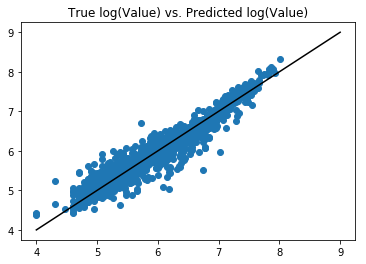

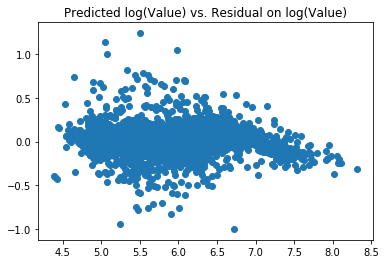

In [216]:
y_test_pred = pipe_best_opt2.predict(X_test)
plt.scatter(y_test,y_test_pred)
grid = np.linspace(4, 9, 2)
plt.plot(grid, grid, color="black")
plt.title('True log(Value) vs. Predicted log(Value)')
plt.show()
plt.scatter(y_test_pred,y_test-y_test_pred)
plt.title('Predicted log(Value) vs. Residual on log(Value)')
plt.show()

## Shaffled Data Runs

### Shaffled data preparation

In [7]:
df_small2 = pd.read_pickle('./input/df_small2.pkl')
df_small2['Value'] = np.log10(df_small2['Value'])

In [8]:
df_small2_bootstrap = [df_small2.sample(frac=1, replace=False, random_state=2001+i) for i in range(10)]

### Batch Run

#### Option 1

In [9]:
from bootstrap.option1 import main_opt1

In [10]:
# TAKES TIME TO RUN THIS CELL (10x250=40mins).
for i in range(10):
    time0 = time.time()
    main_opt1(df_small2_bootstrap[i],i)
    print('Runtime:',time.time()-time0,'sec.\n')

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   23.0s remaining:   34.6s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   23.1s remaining:   15.3s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   23.5s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   23.5s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   29.3s remaining:   43.9s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   29.4s remaining:   19.5s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   30.6s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   30.6s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   16.4s remaining:   24.7s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   16.5s remaining:   1

Bootstrapped dataset# 0 completed.
Runtime: 235.68985319137573 sec.



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   18.6s remaining:   28.0s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   18.7s remaining:   12.4s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   19.6s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   19.6s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   29.1s remaining:   43.7s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   29.1s remaining:   19.4s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   29.4s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   29.4s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   16.9s remaining:   25.4s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   17.0s remaining:   1

Bootstrapped dataset# 1 completed.
Runtime: 225.0168240070343 sec.



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   19.1s remaining:   28.7s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   19.3s remaining:   12.8s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   19.6s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   19.6s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   28.9s remaining:   43.4s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   28.9s remaining:   19.3s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   29.2s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   29.2s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   16.4s remaining:   24.7s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   16.6s remaining:   1

Bootstrapped dataset# 2 completed.
Runtime: 228.7556586265564 sec.



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   19.6s remaining:   29.5s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   19.7s remaining:   13.1s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   19.8s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   19.8s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   28.9s remaining:   43.4s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   29.0s remaining:   19.3s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   29.2s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   29.2s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   16.6s remaining:   25.0s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   16.7s remaining:   1

Bootstrapped dataset# 3 completed.
Runtime: 237.21900534629822 sec.



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   19.0s remaining:   28.6s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   19.1s remaining:   12.7s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   19.6s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   19.6s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   28.6s remaining:   43.0s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   28.6s remaining:   19.1s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   29.0s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   29.0s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   16.5s remaining:   24.8s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   16.5s remaining:   1

Bootstrapped dataset# 4 completed.
Runtime: 238.91069674491882 sec.



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   18.8s remaining:   28.3s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   19.0s remaining:   12.6s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   19.3s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   19.3s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   28.9s remaining:   43.3s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   29.0s remaining:   19.3s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   29.1s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   29.1s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   16.5s remaining:   24.9s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   16.6s remaining:   1

Bootstrapped dataset# 5 completed.
Runtime: 226.6414670944214 sec.



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   19.5s remaining:   29.3s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   19.7s remaining:   13.1s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   20.1s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   20.1s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   28.7s remaining:   43.1s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   28.9s remaining:   19.3s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   29.2s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   29.2s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   16.3s remaining:   24.6s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   16.4s remaining:   1

Bootstrapped dataset# 6 completed.
Runtime: 224.7967827320099 sec.



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   19.5s remaining:   29.3s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   19.6s remaining:   13.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   19.7s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   19.7s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   30.1s remaining:   45.2s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   30.3s remaining:   20.1s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   30.6s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   30.6s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   16.5s remaining:   24.8s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   16.5s remaining:   1

Bootstrapped dataset# 7 completed.
Runtime: 236.60945057868958 sec.



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   19.1s remaining:   28.7s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   19.2s remaining:   12.8s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   19.5s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   19.5s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   29.4s remaining:   44.1s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   29.6s remaining:   19.7s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   29.7s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   29.7s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   16.5s remaining:   24.7s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   16.6s remaining:   1

Bootstrapped dataset# 8 completed.
Runtime: 239.6142258644104 sec.



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   19.0s remaining:   28.6s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   19.2s remaining:   12.7s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   19.6s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   19.6s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   29.1s remaining:   43.8s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   29.3s remaining:   19.5s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   29.7s remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:   29.7s finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:   16.4s remaining:   24.7s
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:   16.6s remaining:   1

Bootstrapped dataset# 9 completed.
Runtime: 241.57164096832275 sec.



#### Option 2

In [11]:
from bootstrap.option2 import main_opt2

In [12]:
# TAKES TIME TO RUN THIS CELL (10x1000sec=3hours).
for i in range(10):
    time0 = time.time()
    main_opt2(df_small2_bootstrap[i],i)
    print('Runtime:',time.time()-time0,'sec.\n')

[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:  5.2min remaining:  7.7min
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:  5.2min remaining:  3.4min
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  5.2min remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  5.2min finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed: 10.2min remaining: 15.2min
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed: 10.4min remaining:  6.9min
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 10.7min remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 10.7min finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:   56.4s
[Parallel(n_jobs=7)]: Done  10 out of  20 | elapsed:  1.4min remaining:  1.4min
[Parallel(n_jobs=7)]: Done  13 out of  20 | elapsed:  1.9min remaining:  1.0min
[Parallel(n_jobs=7)]: Done  16 out of  20 | elapsed:  2.1min remaining:   31.1s
[Parallel(n_jobs=7)]: Done  20 out of  20 | elapsed:  2.3min finished
C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Bootstrapped dataset# 0 completed.
Runtime: 1107.626307964325 sec.



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:  5.4min remaining:  8.0min
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:  5.4min remaining:  3.6min
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  5.5min remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  5.5min finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed: 10.2min remaining: 15.3min
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed: 10.2min remaining:  6.8min
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 10.2min remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 10.2min finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:   34.8s
C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=7)]: Done  10 out of  20 | elapsed:  1.2min remaining:  1.2min
[Parallel(n_jobs=7)]: Done  13 out of  20 | elapsed:  1.2min remaining:   38.8s
[Parallel(n_jobs=7)]: Done  16 out of  20 | elapsed:  1.3min remaining:   20.1s
[Parallel(n_jobs=7)]: Done  20 out of  20 | elapsed:  1.5min finished
C:\Users\daydr\Anaconda3\lib\site

Bootstrapped dataset# 1 completed.
Runtime: 1039.4464285373688 sec.



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:  5.2min remaining:  7.8min
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:  5.2min remaining:  3.5min
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  5.4min remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  5.4min finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed: 10.4min remaining: 15.6min
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed: 10.5min remaining:  7.0min
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 10.9min remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 10.9min finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:   24.8s
C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=7)]: Done  10 out of  20 | e

Bootstrapped dataset# 2 completed.
Runtime: 1059.5465450286865 sec.



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:  5.2min remaining:  7.8min
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:  5.2min remaining:  3.5min
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  5.3min remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  5.3min finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed: 10.0min remaining: 15.0min
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed: 10.2min remaining:  6.8min
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 10.3min remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 10.3min finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:   25.4s
C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\daydr\Anaconda3\lib\site-packages\sk

Bootstrapped dataset# 3 completed.
Runtime: 1028.2128109931946 sec.



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:  5.2min remaining:  7.9min
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:  5.3min remaining:  3.5min
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  5.4min remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  5.4min finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed: 10.0min remaining: 15.0min
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed: 10.4min remaining:  6.9min
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 10.6min remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 10.6min finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:   24.8s
C:\Users\daydr\Anaconda3\lib\site-packages\sk

Bootstrapped dataset# 4 completed.
Runtime: 1040.969330072403 sec.



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:  5.1min remaining:  7.7min
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:  5.1min remaining:  3.4min
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  5.3min remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  5.3min finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:  9.1min remaining: 13.6min
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:  9.9min remaining:  6.6min
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 10.3min remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 10.3min finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:   24.8s
C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\daydr\Anaconda3\lib\site-packages\sk

Bootstrapped dataset# 5 completed.
Runtime: 1017.7207746505737 sec.



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:  5.5min remaining:  8.3min
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:  5.6min remaining:  3.7min
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  5.6min remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  5.6min finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:  9.9min remaining: 14.8min
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed: 10.1min remaining:  6.7min
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 10.2min remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 10.2min finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:   24.5s
C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\daydr\Anaconda3\lib\site-packages\sk

Bootstrapped dataset# 6 completed.
Runtime: 1033.5775213241577 sec.



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:  5.1min remaining:  7.7min
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:  5.1min remaining:  3.4min
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  5.1min remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  5.1min finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed: 10.8min remaining: 16.2min
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed: 10.9min remaining:  7.3min
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 11.0min remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 11.0min finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:   25.3s
C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\daydr\Anaconda3\lib\site-packages\sk

Bootstrapped dataset# 7 completed.
Runtime: 1057.727772474289 sec.



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:  5.4min remaining:  8.1min
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:  5.4min remaining:  3.6min
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  5.4min remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  5.4min finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed: 11.4min remaining: 17.1min
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed: 11.5min remaining:  7.6min
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 12.2min remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 12.2min finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:   29.9s
C:\Users\daydr\Anaconda3\lib\site-packages\sk

Bootstrapped dataset# 8 completed.
Runtime: 1214.5171711444855 sec.



[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed:  5.5min remaining:  8.3min
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed:  5.6min remaining:  3.7min
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  5.7min remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed:  5.7min finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done   2 out of   5 | elapsed: 10.4min remaining: 15.7min
[Parallel(n_jobs=7)]: Done   3 out of   5 | elapsed: 10.5min remaining:  7.0min
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 10.9min remaining:    0.0s
[Parallel(n_jobs=7)]: Done   5 out of   5 | elapsed: 10.9min finished
[Parallel(n_jobs=7)]: Using backend LokyBackend with 7 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=7)]: Done   4 tasks      | elapsed:  1.1min
[Parallel(n_jobs=7)]: Done  10 out of  20 | elapsed:  1.8min remaining:  1.8min
[Parallel(n_jobs=7)]: Done  13 out of  20 | elapsed:  2.1min remaining:  1.2min
[Parallel(n_jobs=7)]: Done  16 out of  20 | elapsed:  2.5min remaining:   37.1s
[Parallel(n_jobs=7)]: Done  20 out of  20 | elapsed:  2.7min finished
C:\Users\daydr\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Bootstrapped dataset# 9 completed.
Runtime: 1166.4569087028503 sec.



### Analysis of results

#### Option 1

In [13]:
for i in range(10):
    
    print('-------------Bootstrap #'+str(i)+'--------------')
    
    with open('./bootstrap/output/bootstrap_opt1_'+str(i)+'_cvres.pkl', 'rb') as f:
        loaded = pickle.load(f)
    cv_val_list = loaded[0]; cv_score_list = loaded[1]; time_list = loaded[2]
    with open('./bootstrap/output/bootstrap_opt1_'+str(i)+'_bestres.pkl', 'rb') as f:
        loaded = pickle.load(f)
    opt1_best = loaded[0]; train_score_best = loaded[1]; test_score_best = loaded[2];
    
    print('\nCV results:')
    display(
        pd.DataFrame(
            list(zip(
                time_list,
                [np.round(sc,5) for sc in cv_score_list],
                [l.mean() for l in cv_score_list],
                [np.sqrt(l.var()) for l in cv_score_list],
                ['lightGBM(min_data_in_leaf=100,num_leaves=40)',
                 'lightGBM(min_data_in_leaf=100,num_leaves=80)',
                 'lightGBM(min_data_in_leaf=200,num_leaves=40)',
                 'lightGBM(min_data_in_leaf=200,num_leaves=80)',
                 'MLR(early_stopping=True,hidden_layer_sizes=(100,))',
                 'MLR(early_stopping=True,hidden_layer_sizes=(50,50,))',
                 'MLR(early_stopping=False,hidden_layer_sizes=(100,))',
                 'MLR(early_stopping=False,hidden_layer_sizes=(50,50,))',]
            )),
            columns=['time','scores','mean_score','sd_score','reg'])
    )    
    
    print('\nBest Model:')
    print(' - Parameters:')
    display(opt1_best.get_params()['steps'][1][1])
    
    print('\n - Final Test Score:', test_score_best)

    print()

-------------Bootstrap #0--------------

CV results:


,time,scores,mean_score,sd_score,reg
0,23.593005,"[0.93017, 0.9345, 0.93331, 0.94045, 0.92828]",0.933340,0.004185,"lightGBM(min_data_in_leaf=100,num_leaves=40)"
1,30.681512,"[0.93135, 0.93545, 0.93346, 0.93923, 0.92969]",0.933835,0.003321,"lightGBM(min_data_in_leaf=100,num_leaves=80)"
2,17.084000,"[0.92686, 0.93071, 0.93057, 0.9354, 0.9271]",0.930127,0.003103,"lightGBM(min_data_in_leaf=200,num_leaves=40)"
3,18.315004,"[0.92643, 0.9313, 0.93, 0.93649, 0.92715]",0.930273,0.003585,"lightGBM(min_data_in_leaf=200,num_leaves=80)"
4,41.610902,"[0.9257, 0.93381, 0.93384, 0.94024, 0.92551]",0.931820,0.005588,"MLR(early_stopping=True,hidden_layer_sizes=(10..."
5,23.832994,"[0.93156, 0.93653, 0.93326, 0.93421, 0.93448]",0.934007,0.001625,"MLR(early_stopping=True,hidden_layer_sizes=(50..."
6,41.321249,"[0.90761, 0.92015, 0.91985, 0.93461, 0.92156]",0.920757,0.008561,"MLR(early_stopping=False,hidden_layer_sizes=(1..."
7,25.471852,"[0.9314, 0.93407, 0.93806, 0.93945, 0.93408]",0.935412,0.002934,"MLR(early_stopping=False,hidden_layer_sizes=(5..."



Best Model:
 - Parameters:


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=2000, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


 - Final Test Score: 0.9352946470045268

-------------Bootstrap #1--------------

CV results:


,time,scores,mean_score,sd_score,reg
0,19.739508,"[0.93543, 0.92934, 0.9374, 0.92806, 0.93402]",0.932850,0.003578,"lightGBM(min_data_in_leaf=100,num_leaves=40)"
1,29.552000,"[0.93495, 0.92824, 0.93694, 0.93194, 0.93234]",0.932881,0.002948,"lightGBM(min_data_in_leaf=100,num_leaves=80)"
2,17.156003,"[0.93135, 0.92477, 0.93587, 0.92503, 0.92949]",0.929304,0.004153,"lightGBM(min_data_in_leaf=200,num_leaves=40)"
3,18.454999,"[0.93342, 0.92494, 0.93736, 0.92623, 0.9288]",0.930149,0.004627,"lightGBM(min_data_in_leaf=200,num_leaves=80)"
4,43.720007,"[0.93002, 0.93169, 0.93472, 0.93063, 0.92966]",0.931345,0.001825,"MLR(early_stopping=True,hidden_layer_sizes=(10..."
5,21.310664,"[0.93163, 0.93454, 0.9355, 0.92662, 0.92646]",0.930949,0.003818,"MLR(early_stopping=True,hidden_layer_sizes=(50..."
6,38.714554,"[0.92757, 0.93184, 0.92753, 0.9267, 0.89432]",0.921592,0.013754,"MLR(early_stopping=False,hidden_layer_sizes=(1..."
7,28.525076,"[0.93657, 0.93462, 0.9262, 0.92667, 0.93551]",0.931914,0.004517,"MLR(early_stopping=False,hidden_layer_sizes=(5..."



Best Model:
 - Parameters:


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=100,
       min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=80,
       objective=None, random_state=1000, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=0)


 - Final Test Score: 0.9429904143498126

-------------Bootstrap #2--------------

CV results:


,time,scores,mean_score,sd_score,reg
0,19.663003,"[0.92886, 0.93568, 0.93489, 0.93308, 0.93851]",0.934202,0.003195,"lightGBM(min_data_in_leaf=100,num_leaves=40)"
1,29.282997,"[0.92788, 0.93468, 0.9333, 0.9343, 0.93904]",0.933840,0.003570,"lightGBM(min_data_in_leaf=100,num_leaves=80)"
2,16.813000,"[0.92691, 0.93162, 0.92934, 0.93257, 0.93709]",0.931508,0.003412,"lightGBM(min_data_in_leaf=200,num_leaves=40)"
3,17.952000,"[0.92669, 0.93243, 0.9293, 0.93259, 0.93723]",0.931647,0.003543,"lightGBM(min_data_in_leaf=200,num_leaves=80)"
4,49.119492,"[0.92417, 0.93238, 0.93378, 0.9356, 0.93296]",0.931780,0.003956,"MLR(early_stopping=True,hidden_layer_sizes=(10..."
5,21.494457,"[0.92905, 0.93812, 0.93839, 0.93346, 0.93181]",0.934168,0.003625,"MLR(early_stopping=True,hidden_layer_sizes=(50..."
6,45.288105,"[0.92121, 0.93637, 0.92631, 0.92789, 0.93684]",0.929723,0.006039,"MLR(early_stopping=False,hidden_layer_sizes=(1..."
7,23.847634,"[0.91681, 0.93661, 0.93355, 0.93669, 0.93483]",0.931698,0.007534,"MLR(early_stopping=False,hidden_layer_sizes=(5..."



Best Model:
 - Parameters:


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=100,
       min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=40,
       objective=None, random_state=1000, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=0)


 - Final Test Score: 0.9345786754366773

-------------Bootstrap #3--------------

CV results:


,time,scores,mean_score,sd_score,reg
0,19.881003,"[0.93478, 0.93164, 0.93216, 0.93802, 0.93651]",0.934623,0.002454,"lightGBM(min_data_in_leaf=100,num_leaves=40)"
1,29.312001,"[0.93405, 0.93235, 0.93391, 0.9378, 0.93542]",0.934708,0.001828,"lightGBM(min_data_in_leaf=100,num_leaves=80)"
2,16.837999,"[0.92863, 0.9298, 0.93009, 0.93126, 0.92849]",0.929655,0.001018,"lightGBM(min_data_in_leaf=200,num_leaves=40)"
3,17.766000,"[0.92811, 0.93084, 0.92955, 0.93246, 0.92826]",0.929844,0.001638,"lightGBM(min_data_in_leaf=200,num_leaves=80)"
4,43.577838,"[0.92971, 0.93223, 0.93631, 0.93171, 0.93348]",0.932686,0.002180,"MLR(early_stopping=True,hidden_layer_sizes=(10..."
5,25.238578,"[0.9371, 0.93332, 0.93523, 0.93468, 0.93552]",0.935168,0.001224,"MLR(early_stopping=True,hidden_layer_sizes=(50..."
6,41.415610,"[0.9237, 0.92852, 0.93222, 0.90253, 0.92864]",0.923122,0.010645,"MLR(early_stopping=False,hidden_layer_sizes=(1..."
7,23.162646,"[0.93446, 0.9326, 0.91407, 0.93793, 0.93465]",0.930742,0.008512,"MLR(early_stopping=False,hidden_layer_sizes=(5..."



Best Model:
 - Parameters:


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=2000, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


 - Final Test Score: 0.9401087834619914

-------------Bootstrap #4--------------

CV results:


,time,scores,mean_score,sd_score,reg
0,19.701002,"[0.93155, 0.93519, 0.93147, 0.93214, 0.94201]",0.934473,0.004005,"lightGBM(min_data_in_leaf=100,num_leaves=40)"
1,29.139002,"[0.92951, 0.93686, 0.9313, 0.93129, 0.94091]",0.933973,0.004261,"lightGBM(min_data_in_leaf=100,num_leaves=80)"
2,16.782000,"[0.92888, 0.93172, 0.93085, 0.92574, 0.93669]",0.930775,0.003599,"lightGBM(min_data_in_leaf=200,num_leaves=40)"
3,17.740519,"[0.92778, 0.9335, 0.92961, 0.92615, 0.93666]",0.930739,0.003841,"lightGBM(min_data_in_leaf=200,num_leaves=80)"
4,45.608999,"[0.93036, 0.92833, 0.93586, 0.93495, 0.94327]",0.934554,0.005180,"MLR(early_stopping=True,hidden_layer_sizes=(10..."
5,25.146523,"[0.93204, 0.93088, 0.93392, 0.93668, 0.94123]",0.934949,0.003701,"MLR(early_stopping=True,hidden_layer_sizes=(50..."
6,37.917000,"[0.92919, 0.91452, 0.93148, 0.93367, 0.92905]",0.927581,0.006746,"MLR(early_stopping=False,hidden_layer_sizes=(1..."
7,22.725990,"[0.9224, 0.93457, 0.91687, 0.91196, 0.9391]",0.924980,0.010327,"MLR(early_stopping=False,hidden_layer_sizes=(5..."



Best Model:
 - Parameters:


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=2000, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


 - Final Test Score: 0.939292151823408

-------------Bootstrap #5--------------

CV results:


,time,scores,mean_score,sd_score,reg
0,19.430981,"[0.93446, 0.93489, 0.93645, 0.93278, 0.93157]",0.934032,0.001699,"lightGBM(min_data_in_leaf=100,num_leaves=40)"
1,29.231001,"[0.93561, 0.93499, 0.93788, 0.93354, 0.93152]",0.934710,0.002120,"lightGBM(min_data_in_leaf=100,num_leaves=80)"
2,16.938453,"[0.92991, 0.932, 0.93243, 0.9282, 0.92554]",0.929616,0.002541,"lightGBM(min_data_in_leaf=200,num_leaves=40)"
3,17.852522,"[0.93016, 0.93117, 0.93269, 0.92752, 0.92681]",0.929671,0.002210,"lightGBM(min_data_in_leaf=200,num_leaves=80)"
4,44.609030,"[0.94064, 0.93262, 0.93748, 0.92784, 0.92583]",0.932881,0.005597,"MLR(early_stopping=True,hidden_layer_sizes=(10..."
5,26.878523,"[0.94057, 0.93791, 0.93799, 0.93326, 0.93104]",0.936153,0.003478,"MLR(early_stopping=True,hidden_layer_sizes=(50..."
6,31.994010,"[0.92225, 0.92442, 0.91049, 0.92505, 0.92063]",0.920571,0.005279,"MLR(early_stopping=False,hidden_layer_sizes=(1..."
7,23.727987,"[0.93199, 0.92507, 0.92501, 0.93342, 0.92625]",0.928346,0.003613,"MLR(early_stopping=False,hidden_layer_sizes=(5..."



Best Model:
 - Parameters:


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=2000, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


 - Final Test Score: 0.9379085567489652

-------------Bootstrap #6--------------

CV results:


,time,scores,mean_score,sd_score,reg
0,20.158971,"[0.93276, 0.93571, 0.93632, 0.93665, 0.93512]",0.935311,0.001381,"lightGBM(min_data_in_leaf=100,num_leaves=40)"
1,29.289528,"[0.93328, 0.93598, 0.93582, 0.93672, 0.93494]",0.935347,0.001179,"lightGBM(min_data_in_leaf=100,num_leaves=80)"
2,16.909002,"[0.92769, 0.93211, 0.93294, 0.93397, 0.93059]",0.931461,0.002185,"lightGBM(min_data_in_leaf=200,num_leaves=40)"
3,17.636996,"[0.92865, 0.93213, 0.9324, 0.93203, 0.93138]",0.931317,0.001375,"lightGBM(min_data_in_leaf=200,num_leaves=80)"
4,44.612029,"[0.93172, 0.93429, 0.93054, 0.93615, 0.93359]",0.933258,0.001964,"MLR(early_stopping=True,hidden_layer_sizes=(10..."
5,24.682969,"[0.93241, 0.92996, 0.93842, 0.93718, 0.92871]",0.933337,0.003852,"MLR(early_stopping=True,hidden_layer_sizes=(50..."
6,37.730464,"[0.9145, 0.93159, 0.93157, 0.92124, 0.9275]",0.925280,0.006585,"MLR(early_stopping=False,hidden_layer_sizes=(1..."
7,25.878835,"[0.92561, 0.93724, 0.93822, 0.94164, 0.93271]",0.935084,0.005528,"MLR(early_stopping=False,hidden_layer_sizes=(5..."



Best Model:
 - Parameters:


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=100,
       min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=80,
       objective=None, random_state=1000, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=0)


 - Final Test Score: 0.9335561867746383

-------------Bootstrap #7--------------

CV results:


,time,scores,mean_score,sd_score,reg
0,19.828002,"[0.9371, 0.92907, 0.94117, 0.93754, 0.93304]",0.935585,0.004151,"lightGBM(min_data_in_leaf=100,num_leaves=40)"
1,30.665999,"[0.9363, 0.92651, 0.94248, 0.93911, 0.93345]",0.935572,0.005430,"lightGBM(min_data_in_leaf=100,num_leaves=80)"
2,17.024999,"[0.93486, 0.92586, 0.93871, 0.93262, 0.93023]",0.932457,0.004319,"lightGBM(min_data_in_leaf=200,num_leaves=40)"
3,17.626003,"[0.93394, 0.92598, 0.93779, 0.93247, 0.93099]",0.932234,0.003860,"lightGBM(min_data_in_leaf=200,num_leaves=80)"
4,43.984643,"[0.93075, 0.93209, 0.94117, 0.93039, 0.93642]",0.934164,0.004108,"MLR(early_stopping=True,hidden_layer_sizes=(10..."
5,27.215600,"[0.93707, 0.93245, 0.94032, 0.93818, 0.93559]",0.936721,0.002634,"MLR(early_stopping=True,hidden_layer_sizes=(50..."
6,43.240308,"[0.92988, 0.90956, 0.93608, 0.92802, 0.92739]",0.926186,0.008865,"MLR(early_stopping=False,hidden_layer_sizes=(1..."
7,25.278018,"[0.92338, 0.92266, 0.94172, 0.93808, 0.93046]",0.931258,0.007649,"MLR(early_stopping=False,hidden_layer_sizes=(5..."



Best Model:
 - Parameters:


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=2000, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


 - Final Test Score: 0.9295631771608268

-------------Bootstrap #8--------------

CV results:


,time,scores,mean_score,sd_score,reg
0,19.625017,"[0.93831, 0.93115, 0.93192, 0.93586, 0.93774]",0.934997,0.002949,"lightGBM(min_data_in_leaf=100,num_leaves=40)"
1,29.827996,"[0.94027, 0.93075, 0.93174, 0.93628, 0.93679]",0.935163,0.003497,"lightGBM(min_data_in_leaf=100,num_leaves=80)"
2,17.128066,"[0.93496, 0.92688, 0.92703, 0.93103, 0.93412]",0.930805,0.003405,"lightGBM(min_data_in_leaf=200,num_leaves=40)"
3,17.525000,"[0.93448, 0.92741, 0.92875, 0.93078, 0.93258]",0.930799,0.002549,"lightGBM(min_data_in_leaf=200,num_leaves=80)"
4,50.269157,"[0.93723, 0.93153, 0.93133, 0.93561, 0.94035]",0.935210,0.003442,"MLR(early_stopping=True,hidden_layer_sizes=(10..."
5,25.351773,"[0.9375, 0.93217, 0.93342, 0.93501, 0.94049]",0.935719,0.002978,"MLR(early_stopping=True,hidden_layer_sizes=(50..."
6,39.462005,"[0.9386, 0.92734, 0.92545, 0.9315, 0.92696]",0.929970,0.004759,"MLR(early_stopping=False,hidden_layer_sizes=(1..."
7,28.232467,"[0.94111, 0.92736, 0.93394, 0.88812, 0.94329]",0.926763,0.020121,"MLR(early_stopping=False,hidden_layer_sizes=(5..."



Best Model:
 - Parameters:


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=2000, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


 - Final Test Score: 0.9324386049253259

-------------Bootstrap #9--------------

CV results:


,time,scores,mean_score,sd_score,reg
0,19.737997,"[0.93231, 0.92927, 0.93565, 0.92787, 0.93802]",0.932624,0.003799,"lightGBM(min_data_in_leaf=100,num_leaves=40)"
1,29.784999,"[0.93248, 0.92958, 0.93581, 0.92929, 0.93667]",0.932767,0.003059,"lightGBM(min_data_in_leaf=100,num_leaves=80)"
2,16.880522,"[0.92976, 0.92495, 0.93003, 0.92516, 0.9318]",0.928339,0.002772,"lightGBM(min_data_in_leaf=200,num_leaves=40)"
3,17.582999,"[0.92979, 0.92524, 0.93171, 0.92513, 0.93089]",0.928553,0.002816,"lightGBM(min_data_in_leaf=200,num_leaves=80)"
4,45.136069,"[0.9283, 0.92321, 0.93198, 0.92744, 0.93851]",0.929888,0.005135,"MLR(early_stopping=True,hidden_layer_sizes=(10..."
5,28.046721,"[0.93687, 0.92905, 0.93149, 0.93017, 0.93815]",0.933147,0.003667,"MLR(early_stopping=True,hidden_layer_sizes=(50..."
6,46.272255,"[0.93162, 0.92387, 0.91228, 0.92114, 0.93583]",0.924949,0.008235,"MLR(early_stopping=False,hidden_layer_sizes=(1..."
7,26.404305,"[0.93658, 0.92384, 0.92093, 0.9261, 0.93878]",0.929245,0.007111,"MLR(early_stopping=False,hidden_layer_sizes=(5..."



Best Model:
 - Parameters:


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=2000, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


 - Final Test Score: 0.9408843086467663



#### Option 2

In [14]:
for i in range(10):
    
    print('-------------Bootstrap #'+str(i)+'--------------')
    
    with open('./bootstrap/output/bootstrap_opt2_'+str(i)+'_cvres.pkl', 'rb') as f:
        loaded = pickle.load(f)
    cv_val_list = loaded[0]; cv_score_list = loaded[1]; time_list = loaded[2]
    with open('./bootstrap/output/bootstrap_opt2_'+str(i)+'_bestres.pkl', 'rb') as f:
        loaded = pickle.load(f)
    opt2_best = loaded[0]; train_score_best = loaded[1]; test_score_best = loaded[2];
    
    print('\nCV results:')
    print(' - Results:')
    display(
        pd.DataFrame(
            list(zip(
                time_list,
                [np.round(sc,5) for sc in cv_score_list],
                [l.mean() for l in cv_score_list],
                [np.sqrt(l.var()) for l in cv_score_list],
                ['lightGBM()',
                 'MLR()',]
            )),
            columns=['time','scores','mean_score','sd_score','reg'])
    )   
    
    print('\n - Best parameters in inner-CV:')
    for m in range(2):
        print('----Model',m,'----')
        for j in range(5):
            print('Inner-CV #',j,cv_val_list[m]['estimator'][j].best_params_)    
    
    print('\nBest Model:')
    print(' - Parameters:')
    display(opt2_best.best_params_)
    
    print('\n - Final Test Score:', test_score_best)

    print('\n\n')

-------------Bootstrap #0--------------

CV results:
 - Results:


,time,scores,mean_score,sd_score,reg
0,313.777196,"[0.93017, 0.9345, 0.93331, 0.94045, 0.92828]",0.933340,0.004185,lightGBM()
1,643.025559,"[0.93156, 0.93381, 0.93384, 0.93421, 0.93448]",0.933579,0.001041,MLR()



 - Best parameters in inner-CV:
----Model 0 ----
Inner-CV # 0 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 1 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 2 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 3 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 4 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
----Model 1 ----
Inner-CV # 0 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 1 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (100,)}
Inner-CV # 2 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (100,)}
Inner-CV # 3 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 4 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}

Best Model:
 - Parameters:


{'reg__early_stopping': False, 'reg__hidden_layer_sizes': (50, 50)}


 - Final Test Score: 0.9352946470045268



-------------Bootstrap #1--------------

CV results:
 - Results:


,time,scores,mean_score,sd_score,reg
0,327.797906,"[0.93495, 0.92934, 0.9374, 0.92806, 0.93402]",0.932753,0.003513,lightGBM()
1,614.828449,"[0.93163, 0.93169, 0.93472, 0.92667, 0.93551]",0.932044,0.003109,MLR()



 - Best parameters in inner-CV:
----Model 0 ----
Inner-CV # 0 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 80}
Inner-CV # 1 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 2 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 3 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 4 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
----Model 1 ----
Inner-CV # 0 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 1 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (100,)}
Inner-CV # 2 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (100,)}
Inner-CV # 3 {'reg__early_stopping': False, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 4 {'reg__early_stopping': False, 'reg__hidden_layer_sizes': (50, 50)}

Best Model:
 - Parameters:


{'reg__min_data_in_leaf': 100, 'reg__num_leaves': 80}


 - Final Test Score: 0.9429904143498126



-------------Bootstrap #2--------------

CV results:
 - Results:


,time,scores,mean_score,sd_score,reg
0,321.157110,"[0.92886, 0.93568, 0.9333, 0.93308, 0.93851]",0.933885,0.003190,lightGBM()
1,651.644426,"[0.92417, 0.93812, 0.93839, 0.93346, 0.93483]",0.933797,0.005169,MLR()



 - Best parameters in inner-CV:
----Model 0 ----
Inner-CV # 0 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 1 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 2 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 80}
Inner-CV # 3 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 4 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
----Model 1 ----
Inner-CV # 0 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (100,)}
Inner-CV # 1 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 2 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 3 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 4 {'reg__early_stopping': False, 'reg__hidden_layer_sizes': (50, 50)}

Best Model:
 - Parameters:


{'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}


 - Final Test Score: 0.9345786754366773



-------------Bootstrap #3--------------

CV results:
 - Results:


,time,scores,mean_score,sd_score,reg
0,318.272163,"[0.93478, 0.93235, 0.93391, 0.93802, 0.93651]",0.935116,0.001980,lightGBM()
1,620.111310,"[0.9371, 0.93332, 0.91407, 0.93171, 0.93552]",0.930341,0.008343,MLR()



 - Best parameters in inner-CV:
----Model 0 ----
Inner-CV # 0 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 1 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 80}
Inner-CV # 2 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 80}
Inner-CV # 3 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 4 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
----Model 1 ----
Inner-CV # 0 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 1 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 2 {'reg__early_stopping': False, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 3 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (100,)}
Inner-CV # 4 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}

Best Model:
 - Parameters:


{'reg__min_data_in_leaf': 100, 'reg__num_leaves': 80}


 - Final Test Score: 0.9363143433377841



-------------Bootstrap #4--------------

CV results:
 - Results:


,time,scores,mean_score,sd_score,reg
0,322.467132,"[0.93155, 0.93686, 0.93147, 0.93214, 0.94201]",0.934808,0.004119,lightGBM()
1,634.235194,"[0.92919, 0.93088, 0.93392, 0.93495, 0.94327]",0.934441,0.004875,MLR()



 - Best parameters in inner-CV:
----Model 0 ----
Inner-CV # 0 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 1 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 80}
Inner-CV # 2 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 3 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 4 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
----Model 1 ----
Inner-CV # 0 {'reg__early_stopping': False, 'reg__hidden_layer_sizes': (100,)}
Inner-CV # 1 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 2 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 3 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (100,)}
Inner-CV # 4 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (100,)}

Best Model:
 - Parameters:


{'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}


 - Final Test Score: 0.934196651795608



-------------Bootstrap #5--------------

CV results:
 - Results:


,time,scores,mean_score,sd_score,reg
0,315.218064,"[0.93561, 0.93489, 0.93645, 0.93278, 0.93157]",0.934262,0.001816,lightGBM()
1,615.646636,"[0.94057, 0.93262, 0.93799, 0.92784, 0.93104]",0.934011,0.004641,MLR()



 - Best parameters in inner-CV:
----Model 0 ----
Inner-CV # 0 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 80}
Inner-CV # 1 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 2 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 3 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 4 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
----Model 1 ----
Inner-CV # 0 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 1 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (100,)}
Inner-CV # 2 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 3 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (100,)}
Inner-CV # 4 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}

Best Model:
 - Parameters:


{'reg__min_data_in_leaf': 100, 'reg__num_leaves': 80}


 - Final Test Score: 0.9375978543139255



-------------Bootstrap #6--------------

CV results:
 - Results:


,time,scores,mean_score,sd_score,reg
0,336.274504,"[0.93276, 0.93598, 0.93632, 0.93665, 0.93512]",0.935364,0.001400,lightGBM()
1,610.658335,"[0.93241, 0.92996, 0.93842, 0.93718, 0.92871]",0.933337,0.003852,MLR()



 - Best parameters in inner-CV:
----Model 0 ----
Inner-CV # 0 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 1 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 80}
Inner-CV # 2 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 3 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 4 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
----Model 1 ----
Inner-CV # 0 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 1 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 2 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 3 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 4 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}

Best Model:
 - Parameters:


{'reg__min_data_in_leaf': 100, 'reg__num_leaves': 80}


 - Final Test Score: 0.9335561867746383



-------------Bootstrap #7--------------

CV results:
 - Results:


,time,scores,mean_score,sd_score,reg
0,307.726764,"[0.9371, 0.92907, 0.94117, 0.93754, 0.93304]",0.935585,0.004151,lightGBM()
1,659.397002,"[0.92988, 0.93209, 0.94117, 0.93039, 0.93642]",0.933990,0.004264,MLR()



 - Best parameters in inner-CV:
----Model 0 ----
Inner-CV # 0 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 1 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 2 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 3 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 4 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
----Model 1 ----
Inner-CV # 0 {'reg__early_stopping': False, 'reg__hidden_layer_sizes': (100,)}
Inner-CV # 1 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (100,)}
Inner-CV # 2 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (100,)}
Inner-CV # 3 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (100,)}
Inner-CV # 4 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (100,)}

Best Model:
 - Parameters:


{'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}


 - Final Test Score: 0.9288120234936367



-------------Bootstrap #8--------------

CV results:
 - Results:


,time,scores,mean_score,sd_score,reg
0,326.453933,"[0.93831, 0.93115, 0.93192, 0.93586, 0.93774]",0.934997,0.002949,lightGBM()
1,731.714920,"[0.94111, 0.92736, 0.93394, 0.88812, 0.94049]",0.926203,0.019687,MLR()



 - Best parameters in inner-CV:
----Model 0 ----
Inner-CV # 0 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 1 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 2 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 3 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 4 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
----Model 1 ----
Inner-CV # 0 {'reg__early_stopping': False, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 1 {'reg__early_stopping': False, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 2 {'reg__early_stopping': False, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 3 {'reg__early_stopping': False, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 4 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}

Best Model:
 - Parameters:


{'reg__min_data_in_leaf': 100, 'reg__num_leaves': 80}


 - Final Test Score: 0.9370341857712756



-------------Bootstrap #9--------------

CV results:
 - Results:


,time,scores,mean_score,sd_score,reg
0,339.598993,"[0.93231, 0.92927, 0.93581, 0.92929, 0.93802]",0.932940,0.003496,lightGBM()
1,651.810888,"[0.93687, 0.92905, 0.93198, 0.93017, 0.93815]",0.933244,0.003628,MLR()



 - Best parameters in inner-CV:
----Model 0 ----
Inner-CV # 0 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 1 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
Inner-CV # 2 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 80}
Inner-CV # 3 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 80}
Inner-CV # 4 {'reg__min_data_in_leaf': 100, 'reg__num_leaves': 40}
----Model 1 ----
Inner-CV # 0 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 1 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 2 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (100,)}
Inner-CV # 3 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}
Inner-CV # 4 {'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}

Best Model:
 - Parameters:


{'reg__early_stopping': True, 'reg__hidden_layer_sizes': (50, 50)}


 - Final Test Score: 0.9408843086467664



